In [3]:
import math
import warnings
from math import*
from sqlalchemy import create_engine
import numpy as np
import pandas
import pandas as pd
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.io as scio
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

1.（不動點迭代）已知方程x3-x2-0.8=0在x0=1.5附近有一個根，將此方程改成兩個等價形式x=(0.8+x2)1/3和x= (x3-0.8)1/2，並構造如下兩個迭代公式：
(1) xk+1=(0.8+xk2)1/3
(2) xk+1=(xk3-0.8)1/2
試判斷兩個迭代公式是否收斂，選擇一個收斂較快的迭代公式，求​​出具有4位有效數字的近似根。

In [9]:
a0=2
a1=(0.8+a0**2)**(1/3)
iter_max=1
while abs(a0-a1)>0.0001 and iter_max<1000:
    a0=a1
    a1=(0.8+a0**2)**(1/3)
    iter_max=iter_max+1
print('{:d}{:.10f}{:.10f}\n'.format(iter_max,a0,a1))

a0=2
a1=(0.8+a0**2)**(1/3)
iter_max = 1
print('{:d}{:.10f}{:.10f}\n'.format(iter_max,a0,a1));
while abs(a0-a1) > 0.00001 and iter_max < 1000:
    a0 = a1
    a1=(0.8+a0**2)**(1/3)
    iter_max = iter_max+1
print('{:d}{:.10f}{:.10f}\n'.format(iter_max,a0,a1))

a0=2
a1=(a0**3-0.8)**(1/2)
iter_max = 1
while abs(a0-a1) > 0.00001 and iter_max < 1000:
    a0 = a1
    a1=(a0**3-0.8)**(1/2)
    iter_max = iter_max+1
    print('{:d}  {:.10f}  {:.10f}\n'.format(iter_max,a0,a1))

121.40533066451.4052446607

12.00000000001.6868653306

151.40518449801.4051753134

2  2.6832815730  4.3034436589

3  4.3034436589  8.8824643416

4  8.8824643416  26.4577059916

5  26.4577059916  136.0877078594

6  136.0877078594  1587.5531717033

7  1587.5531717033  63254.6445926356

8  63254.6445926356  15908844.2436215002

9  15908844.2436215002  63453845206.6258544922

10  63453845206.6258544922  15984053231905936.0000000000

11  15984053231905936.0000000000  2020832770028314965311488.0000000000

12  2020832770028314965311488.0000000000  2872734987375970416245045500653338624.0000000000

13  2872734987375970416245045500653338624.0000000000  4869040036511532702966140000896084595196724733823418368.0000000000

14  4869040036511532702966140000896084595196724733823418368.0000000000  10743975725423448779885498475394885568777347760596994198650594090503795600204496896.0000000000

15  10743975725423448779885498475394885568777347760596994198650594090503795600204496896.0000000000  1113646938891

OverflowError: (34, 'Result too large')

2. (病態求根問題、牛頓法)利用牛頓法在[1, 1.2]中尋找如下方程
x4-5.4x3+10.56x2-8.954x+2.7951=0
的根。

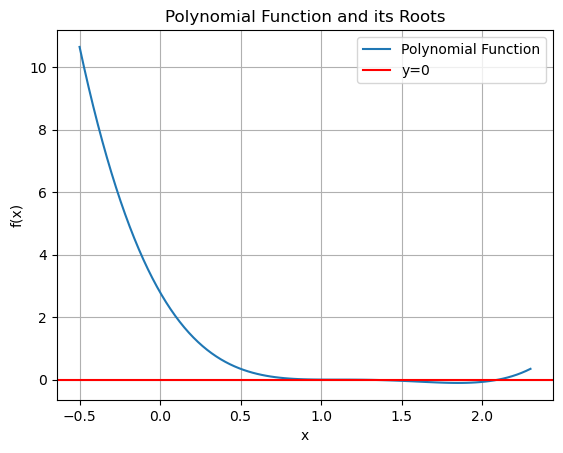

Maximum iterations reached without convergence.
Maximum iterations reached without convergence.
Root near 1.2: None
Root near 1.0: None


In [7]:
# Define the polynomial function
def my_polynomial(x):
    return x**4 - 5.4 * (x**3) + 10.56 * (x**2) - 8.954 * x + 2.7951

# Define the first derivative
def my_polynomial_derivative(x):
    return 4 * (x**3) - 16.2 * (x**2) - 8.954

# Define the second derivative
def my_polynomial_second_derivative(x):
    return 12 * (x**2) - 32.4 * (x**1)

# Newton-Raphson method for root finding
def newton_raphson_root_finding(x0, tolerance, max_iterations=100):
    for _ in range(max_iterations):
        f = my_polynomial(x0)
        df = my_polynomial_derivative(x0)
        dff = my_polynomial_second_derivative(x0)

        if df == 0:  # Prevent division by zero
            print("Derivative is zero. No solution found.")
            return None
        
        x1 = x0 - (f * df) / (df**2 - f * dff)
        
        if abs(x1 - x0) < tolerance:
            return x1
        
        x0 = x1

    print("Maximum iterations reached without convergence.")
    return None

# Set up the plot
x = np.linspace(-0.5, 2.3, 100)
y = my_polynomial(x)

plt.plot(x, y, label='Polynomial Function')
plt.axhline(y=0, color='r', linestyle='-', label='y=0')
plt.title('Polynomial Function and its Roots')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

# Finding roots
root1 = newton_raphson_root_finding(1.2, 1e-8)
root2 = newton_raphson_root_finding(1.0, 1e-8)

print(f"Root near 1.2: {root1}")
print(f"Root near 1.0: {root2}")

3. 計算下列數據的線性最小二乘擬合。畫出數據和最小二乘擬合的圖形；再求最小二乘擬合的均方根誤差。
西一西一西一
-1.0 1.032 -0.3 1.139 0.4 -0.415
-0.9 1.563 -0.2 0.646 0.5 -0.112
-0.8 1.614 -0.1 0.474 0.6 -0.817
-0.71.37700.4180.7-0.234
-0.6 1.179 0.1 0.067 0.8 -0.623
-0.5 1.189 0.2 0.371 0.9 -0.536
-0.40.9100.30.1831.0 -1.173
請寫出Python代碼，文件名為

[-1.26909091]
[0.39295238]


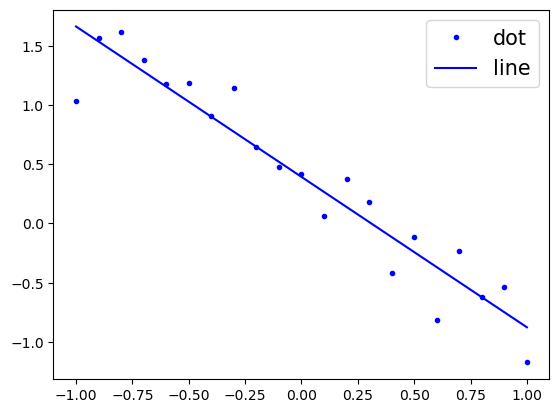

均方根误差 1.4496798332899645


In [10]:
xi=np.array([-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
yi=np.array([1.032,1.563,1.614,1.377,1.179,1.189,0.910,1.139,0.646,0.474,0.418,0.067,0.371,0.183,-0.415,-0.112,-0.817,-0.234,-0.623,-0.536,-1.173])
def haiboliu(xi,yi):
    n=len(xi)
    sumXi=np.sum(xi)
    sumXi2=np.sum(xi**2)
    sumYi=np.sum(yi)
    sumXiYi=np.sum(xi*yi)
    A=np.array([[n,sumXi],[sumXi,sumXi2]])
    b=np.array([[sumYi],[sumXiYi]])
    ParLSQ=np.dot(np.linalg.inv(A),b)#A的逆矩阵乘以b求出ab
    return ParLSQ

ParLSQ=haiboliu(xi,yi)
b=ParLSQ[0]#x=0y=0带入
m=ParLSQ[1]
step=(max(xi)-min(xi))/100
x=np.arange(min(xi),max(xi)+step,step)
y=m*x+b
plt.plot(xi,yi,'b.',x,y,'b-')
plt.legend(['dot' ,'line'],fontsize=15,loc='best')
print(m)
print(b)
plt.show()

def rmse(prediction, target):
    return np.sqrt(((prediction-target)**2).mean())
ans=rmse(xi,yi)
print("均方根误差",ans)

4.請分別從銳思數據庫和59.78.102.118:research數據庫下載滬深300指數和萬科A在2010年1月1日到2018年12月31日每日收盤價，分別計算滬深300指數和萬科A的日超額收益率，並用萬科A的超額收益率對滬深300指數的超額收益率做線性擬合，計算斜率和截距，並進行討論。

R² Score: 0.46941129223629996
Coefficients: [ 0.20358835  0.01365999  0.00030381 -0.0052644 ]
Parameters: [[ 8.51414302e+00]
 [ 1.71884390e-01]
 [ 1.39354638e-02]
 [ 3.42392635e-04]
 [-5.01884906e-03]]


D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31609 (\N{CJK UNIFIED IDEOGRAPH-7B79}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27454 (\N{CJK UNIFIED IDEOGRAPH-6B3E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39033 (\N{CJK UNIFIED IDEOGRAPH-9879}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabt

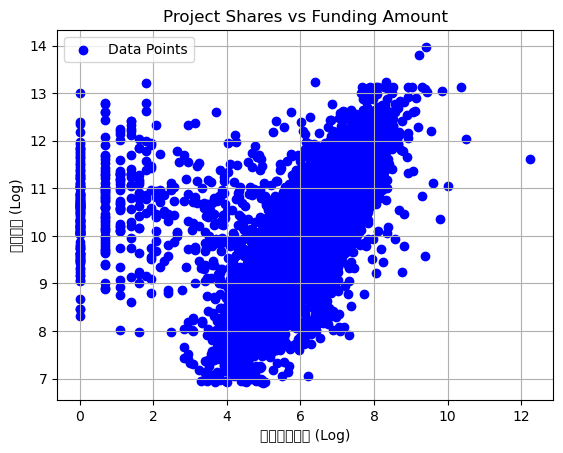

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('20211102-Python-实验数据-轻松筹项目数据.xlsx')

# Transform the data using logarithm
data['项目分享次数'] = np.log(data['项目分享次数'])
data['筹款金额'] = np.log(data['筹款金额'])

# Define features and target
X = data.iloc[:, 1:5].values  # Adjust column indices as needed
y = data.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_pred)
print(f'R² Score: {score}')
print('Coefficients:', regressor.coef_)

# Define the custom function for multivariate regression
def calculate_parameters(data):
    n = len(data)
    
    # Calculate necessary sums for the regression matrix
    sumX1 = np.sum(data['项目分享次数'])
    sumY = np.sum(data['筹款金额'])
    sumX2 = np.sum(data['证明人数'])
    sumX3 = np.sum(data['项目描述长度'])
    sumX4 = np.sum(data['患者年龄'])
    
    sumX1X2 = np.sum(data['项目分享次数'] * data['证明人数'])
    sumX1X3 = np.sum(data['项目分享次数'] * data['项目描述长度'])
    sumX1X4 = np.sum(data['项目分享次数'] * data['患者年龄'])
    sumX2X3 = np.sum(data['证明人数'] * data['项目描述长度'])
    sumX2X4 = np.sum(data['证明人数'] * data['患者年龄'])
    sumX3X4 = np.sum(data['项目描述长度'] * data['患者年龄'])

    # Construct matrix A
    A = np.array([
        [n, sumX1, sumX2, sumX3, sumX4],
        [sumX1, np.sum(data['项目分享次数']**2), sumX1X2, sumX1X3, sumX1X4],
        [sumX2, sumX1X2, np.sum(data['证明人数']**2), sumX2X3, sumX2X4],
        [sumX3, sumX1X3, sumX2X3, np.sum(data['项目描述长度']**2), sumX3X4],
        [sumX4, sumX1X4, sumX2X4, sumX3X4, np.sum(data['患者年龄']**2)]
    ])
    
    # Construct vector b
    b = np.array([[sumY], 
                  [np.sum(data['项目分享次数'] * data['筹款金额'])], 
                  [np.sum(data['证明人数'] * data['筹款金额'])], 
                  [np.sum(data['项目描述长度'] * data['筹款金额'])], 
                  [np.sum(data['患者年龄'] * data['筹款金额'])]])

    # Calculate parameters
    return np.dot(np.linalg.inv(A), b)

# Calculate parameters
params = calculate_parameters(data)
print('Parameters:', params)

# Visualization
plt.scatter(data['项目分享次数'], data['筹款金额'], color='blue', label='Data Points')
plt.xlabel('项目分享次数 (Log)')
plt.ylabel('筹款金额 (Log)')
plt.title('Project Shares vs Funding Amount')
plt.legend()
plt.grid(True)
plt.show()
